# Assignment 1 - Logistic Regression

In [2]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import minimize

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

### 1.1 Visualizing the Data

In [3]:
def plotData(data, label_x='Exam I Score', label_y='Exam II Score', 
             legend_pos='Admitted', legend_neg='Not Admitted'):
    pos = data[:, 2] == 1
    neg = data[:, 2] == 0
    plt.scatter(data[pos][:, 0], data[pos][:, 1], marker='+', color='k',label=legend_pos)
    plt.scatter(data[neg][:, 0], data[neg][:, 1], marker='o', color='y', label=legend_neg)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.legend(frameon=True)
    plt.show()

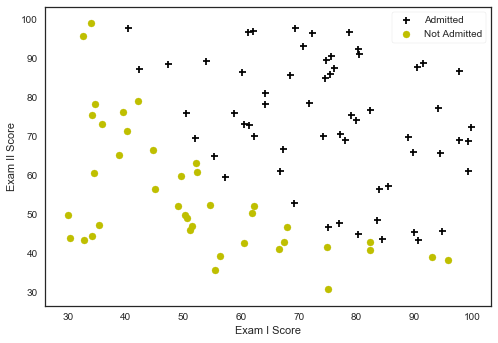

In [4]:
data = np.loadtxt('ex2/ex2data1.txt', delimiter=',')
plotData(data)


In [36]:
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = data[:, 2]

### 1.2 Implementation
#### 1.2.1 Sigmoid function

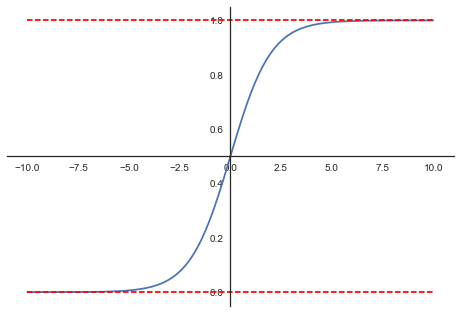

In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 101)
y = sigmoid(z)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
upperBound = np.ones(z.shape)
lowerBound = np.zeros(z.shape)
plt.plot(z, y)
plt.plot(z, upperBound, 'r--', z, lowerBound, 'r--')
plt.show()

##### 1.2.2 Cost Function
$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m} [-y^{(i)}\log \big(h_\theta(x^{(i)})\big)-(1-y^{(i)})\log \big(1-h_\theta(x^{(i)})\big)]$$

In [47]:
def costFunction(X, y, theta):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = -1.0/m * (y.T.dot(np.log(h)) + (1.0-y).T.dot(np.log(1.0-h)))
    return J

theta = np.zeros(X.shape[1])
J = costFunction(X, y, theta)
print 'Cost:', J

Cost: 0.69314718056


##### Gradient of the cost
$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}\big(h_\theta(x^{(i)})-y^{(i)}\big)x^{(i)}_j$$

In [48]:
def gradient(X, y, theta):
    m = y.size
    h = sigmoid(X.dot(theta))
    grad = 1.0/m * (h - y).dot(X)
    return grad

grad = gradient(X, y, theta)
print 'Gradient:', grad

Gradient: [ -0.1        -12.00921659 -11.26284221]


##### 1.2.3 Learning parameters